In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
import nltk
from datetime import datetime
import pytz

In [2]:
bipolar_df =pd.read_csv('../scraping/bipolar.csv')

In [3]:
bipolar_df.drop_duplicates(subset='id', keep='last', inplace=True)

In [4]:
bipolar_df

,id,title,text,score,comments_count,author,created_utc,gilding
70,149w021,I'm a dumbass and I'm scared,I'm just a major dumbass. I was manic for mayb...,8,4,LeroyBarela,1.686815e+09,0
874,131w2z4,I’m thinking of unfollowing this sub,Is it just me or does it seem as if some peopl...,7,65,imperfectlystupid,1.682694e+09,0
875,11c2rt1,Bet I can stump you on at least one of these!,NaN,0,23,firecrackergurl,1.677378e+09,0
876,bup3ue,"Ew, I stepped in shit.",NaN,28,80,smokepropane,1.559192e+09,0
877,11ov0nr,No more medication. I Refuse.,Coming off my meds. I can’t live like this.\n\...,0,52,Interesting-Face22,1.678569e+09,0
...,...,...,...,...,...,...,...,...
3882,df2qtw,Hurry up and wait.,NaN,760,40,Ishouldtrythat,1.570554e+09,0
3883,d0wrwm,It might actually be day three of bedtime atti...,NaN,752,29,WhispersOfPorcelain,1.567867e+09,0
3884,qduhxm,Like I remember all the meds I've tried? I'm B...,NaN,755,133,almostmrsmiller,1.634951e+09,0
3885,mm9b25,Drew this pre-diagnosis...it makes sense though,NaN,759,45,braingobrrrrrrrr,1.617822e+09,0


In [5]:
def convert_to_sgt(timestamp):
    dt_object_utc = datetime.utcfromtimestamp(timestamp).replace(tzinfo=pytz.utc)
    dt_object_sgt = dt_object_utc.astimezone(pytz.timezone('Asia/Singapore'))
    return dt_object_sgt

In [6]:
bipolar_df['created_sgt'] = bipolar_df['created_utc'].apply(convert_to_sgt)

In [7]:
bipolar_df['published_date'] = bipolar_df['created_sgt'].apply(lambda x: x.date())
bipolar_df['published_time'] = bipolar_df['created_sgt'].apply(lambda x: x.time())
bipolar_df['published_day_of_week'] = pd.to_datetime(bipolar_df['published_date']).dt.day_name()

In [8]:
bipolar_df.drop(['id', 'created_utc', 'created_sgt', 'published_date'], axis = 1, inplace=True)

In [9]:
bipolar_df.reset_index(drop = True, inplace= True)

In [10]:
bipolar_df

,title,text,score,comments_count,author,gilding,published_time,published_day_of_week
0,I'm a dumbass and I'm scared,I'm just a major dumbass. I was manic for mayb...,8,4,LeroyBarela,0,15:36:31,Thursday
1,I’m thinking of unfollowing this sub,Is it just me or does it seem as if some peopl...,7,65,imperfectlystupid,0,23:06:21,Friday
2,Bet I can stump you on at least one of these!,NaN,0,23,firecrackergurl,0,10:17:15,Sunday
3,"Ew, I stepped in shit.",NaN,28,80,smokepropane,0,12:56:00,Thursday
4,No more medication. I Refuse.,Coming off my meds. I can’t live like this.\n\...,0,52,Interesting-Face22,0,05:02:18,Sunday
...,...,...,...,...,...,...,...,...
2978,Hurry up and wait.,NaN,760,40,Ishouldtrythat,0,00:54:46,Wednesday
2979,It might actually be day three of bedtime atti...,NaN,752,29,WhispersOfPorcelain,0,22:40:15,Saturday
2980,Like I remember all the meds I've tried? I'm B...,NaN,755,133,almostmrsmiller,0,08:57:26,Saturday
2981,Drew this pre-diagnosis...it makes sense though,NaN,759,45,braingobrrrrrrrr,0,03:02:09,Thursday


In [11]:
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [12]:
bipolar_df['title_cleaned'] = bipolar_df['title'].apply(lambda x: remove_punct(x))

In [13]:
bipolar_df['title_cleaned'].head()

0                      Im a dumbass and Im scared
1            I’m thinking of unfollowing this sub
2    Bet I can stump you on at least one of these
3                            Ew I stepped in shit
4                     No more medication I Refuse
Name: title_cleaned, dtype: object

In [14]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [15]:
bipolar_df['title_tokenized'] = bipolar_df['title_cleaned'].apply(lambda x: tokenize(x.lower()))

In [16]:
bipolar_df['title_tokenized'].head()

0                    [im, a, dumbass, and, im, scared]
1         [i, m, thinking, of, unfollowing, this, sub]
2    [bet, i, can, stump, you, on, at, least, one, ...
3                           [ew, i, stepped, in, shit]
4                    [no, more, medication, i, refuse]
Name: title_tokenized, dtype: object

In [17]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

In [18]:
bipolar_df['title_tokenized_nostopword'] = bipolar_df['title_tokenized'].apply(lambda x: remove_stopwords(x))

In [19]:
bipolar_df['title_tokenized_nostopword'].head()

0       [im, dumbass, im, scared]
1    [thinking, unfollowing, sub]
2        [bet, stump, least, one]
3             [ew, stepped, shit]
4            [medication, refuse]
Name: title_tokenized_nostopword, dtype: object

In [20]:
#remove the empty string
bipolar_df['title_tokenized_nostopword'] = bipolar_df['title_tokenized_nostopword'].apply(lambda x: [word for word in x if word != ''])

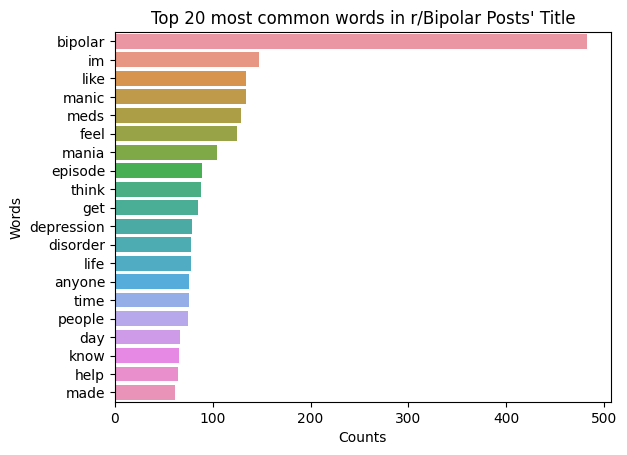

In [21]:
bipolar_all_words = [word for tokens in bipolar_df['title_tokenized_nostopword'] for word in tokens]
bipolar_word_counts = Counter(bipolar_all_words)

# Get the 20 most common words
bipolar_common_words = bipolar_word_counts.most_common(20)

# Convert the list of tuples into two lists: one for the words and one for the counts
bipolar_word_df = pd.DataFrame(bipolar_common_words, columns=['Words', 'Counts'])

# Plot the words against the counts
sns.barplot(y='Words', x='Counts', data=bipolar_word_df)
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 20 most common words in r/Bipolar Posts\' Title')
plt.show()

Based on preliminary analysis of post titles in the r/bipolar subreddit, certain trends and patterns have emerged. The term 'bipolar' is most prominently represented, featuring in approximately 16% of all post titles. This suggests a strong inclination for users to explicitly mention the condition when framing their discussions.
<br><br>
Other prevalent terms in the dataset include 'manic' and 'meds', each found in roughly 4% of the post titles. Additionally, the term 'mania' is identified in about 3.4% of the post titles. This indicates that discussions around episodes of mania and medication usage are significant sub-themes within the broader conversation about bipolar disorder.
<br><br>
Further, the words 'episode', 'depression', 'disorder', 'life', 'anyone', and 'help' each appear in approximately 2% of all the post titles. This diversified range of frequently occurring terms suggests that the subreddit's discussions are not limited to medical or clinical aspects, but also touch on personal experiences, emotional states, and calls for assistance or advice. In sum, these insights provide a compelling snapshot of the thematic contours of the conversations taking place within the r/bipolar subreddit.

In [22]:
print(f'The percentage of text posts to other posts types in r/bipolar is {round(bipolar_df["text"].notnull().sum()/bipolar_df.shape[0]*100, 2)}%')

The percentage of text posts to other posts types in r/bipolar is 58.97%


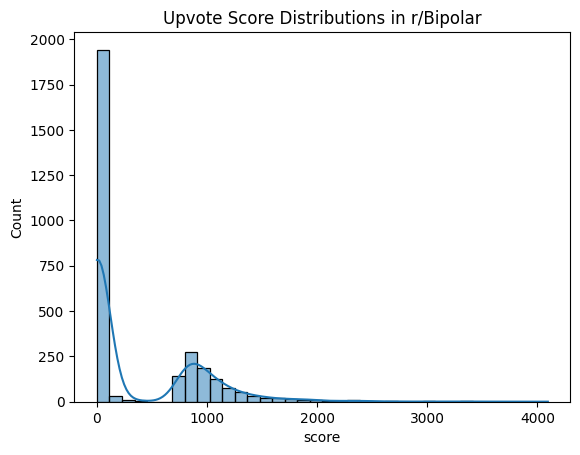

In [23]:
sns.histplot(data=bipolar_df, x='score', kde=True)
plt.title('Upvote Score Distributions in r/Bipolar')
plt.show()

It is evident from the above histogram that a substantial portion of posts within the r/bipolar community garnered negligible upvote interactions. Conversely, it is observed that posts attaining noteworthy upvote scores predominantly constitute the realm of popular content, amassing several hundreds to early thousands of upvotes.

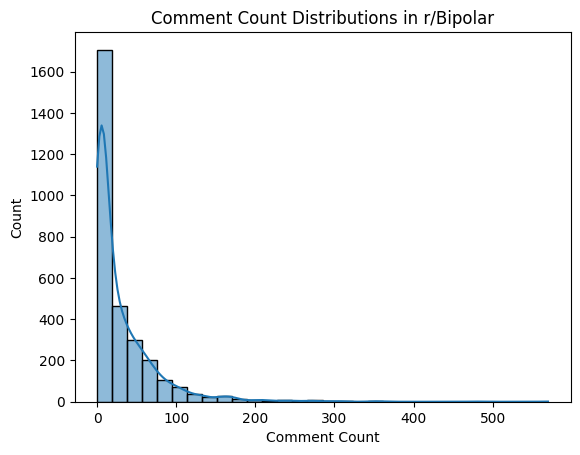

In [24]:
sns.histplot(data=bipolar_df, x='comments_count', kde=True, bins = 30)
plt.title('Comment Count Distributions in r/Bipolar')
plt.xlabel('Comment Count')
plt.show()

The comment count distribution appears to be right-skewed, showing that while majority of the posts in r/bipolar garner a relatively low number of comments, there is a minority of posts that accumulate a significantly higher comment count. This is a common pattern in online engagement, where a small number of posts generate a lot of discussion, but the majority of posts receive less interactions.

Text(0.5, 1.0, 'Award Count for Each Post in r/bipolar')

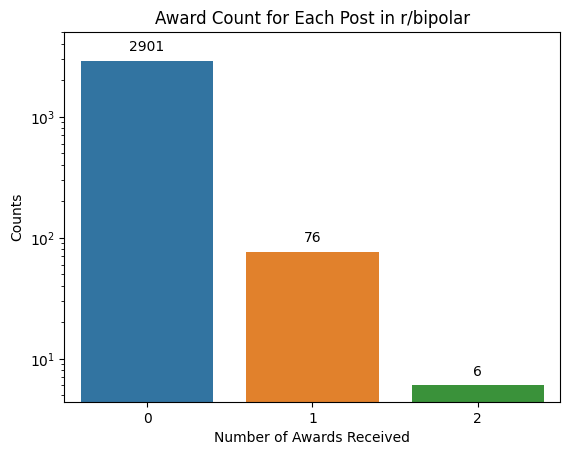

In [25]:
ax = sns.countplot(x='gilding', data=bipolar_df)
plt.yscale('log')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.ylim(top = 5000)
plt.xlabel('Number of Awards Received')
plt.ylabel('Counts')
plt.title('Award Count for Each Post in r/bipolar')


Out of the total posts analyzed, a vast majority did not receive any awards. This suggests that the awarding of posts is not a common occurrence within this subreddit community.
<br><br>
On the other hand, a small fraction of posts, received one or two awards. This indicates that while rare, some posts do receive recognition in the form of awards from the community. These posts may contain content that is particularly resonant, informative, or valuable to the subreddit members.
<br><br>
This pattern of distribution is not uncommon in online communities, where the majority of user-generated content may not receive significant recognition, while a small fraction of content garners most of the attention and rewards.

Text(0.5, 1.0, 'Posting Frequency per Day of the Week in r/bipolar')

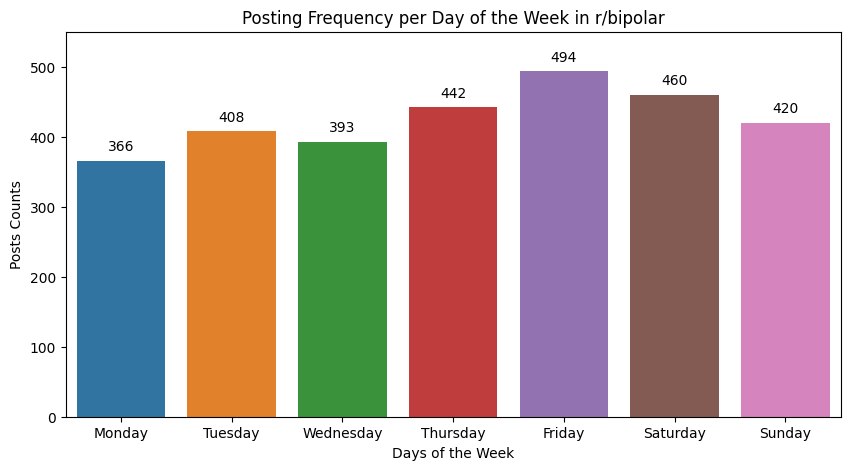

In [26]:
plt.figure(figsize=(10,5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.countplot(x='published_day_of_week', data=bipolar_df, order = day_order)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.xlabel('Days of the Week')
plt.ylabel('Posts Counts')
plt.ylim(top = 550)
plt.title('Posting Frequency per Day of the Week in r/bipolar')

The daily distribution of post frequencies within the r/bipolar subreddit appears to be uniform, indicating no significant difference in user engagement across different days of the week. This suggests a non-cyclic posting behavior in this community, wherein user interactions in terms of posting are evenly spread out through the week. However, a minor peak is observed on Fridays, but it's not enough to establish a clear weekly pattern or trend.

In [27]:
bipolar_df['hour_of_day'] = bipolar_df['published_time'].apply(lambda x: str(x)[:2])

Text(0.5, 1.0, 'Number of Posts per Hour of the Day')

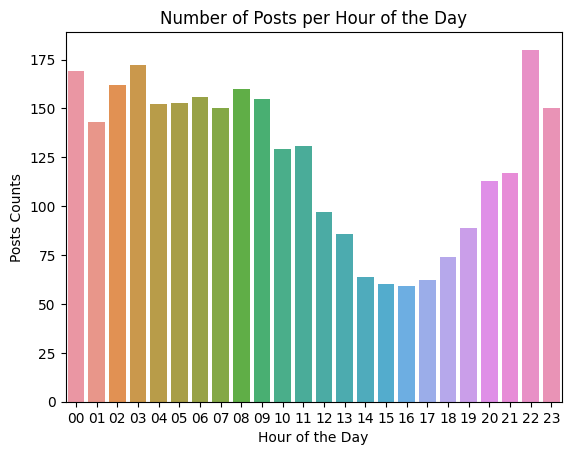

In [28]:
ax = sns.countplot(x='hour_of_day', data=bipolar_df, order = [str(i).zfill(2) for i in range(0, 24)])

# Set the x-axis and y-axis labels
plt.xlabel('Hour of the Day')
plt.ylabel('Posts Counts')

# Set the title of the plot
plt.title('Number of Posts per Hour of the Day')

The hourly distribution of posts in the r/bipolar subreddit (according to Singapore time) generally displays a uniform pattern, indicating consistent user activity across the majority of the day. However, a marked decrease in posting frequency is observed during the hours from 12:00 to 21:00. This could suggest a diurnal rhythm to user activity within this community, with potential dips in interaction during these specific hours. It's important to note that the reasons behind this could be multifaceted, possibly ranging from timezone influences to users' daily routines or habits.

In [30]:
#import wordcloud
from wordcloud import WordCloud

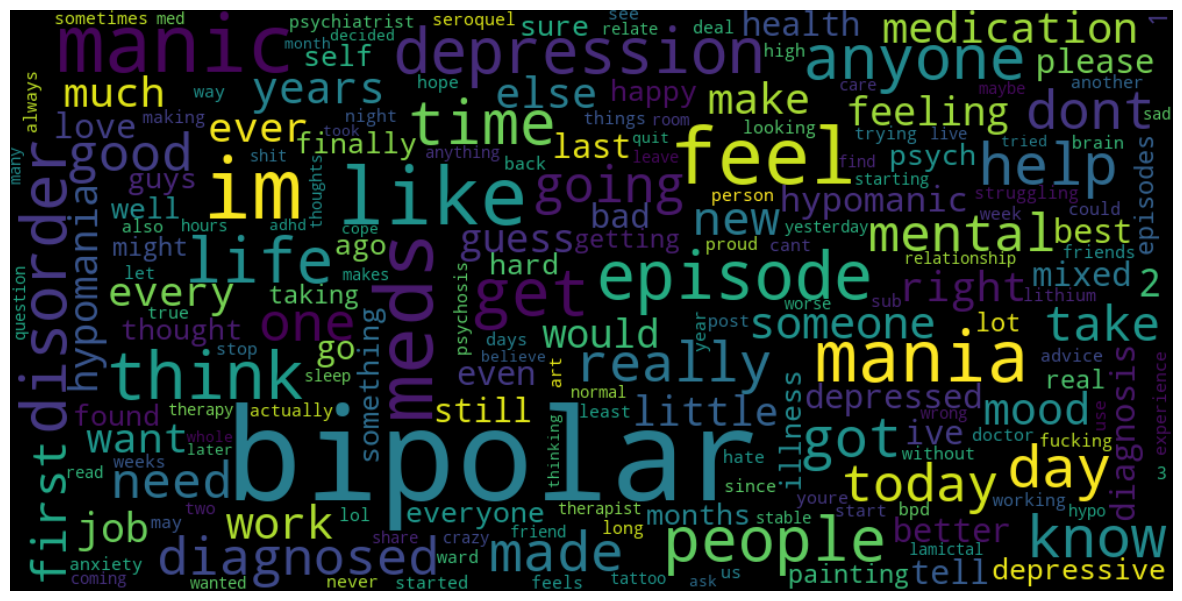

In [31]:
bipolar_word_dict = dict(bipolar_word_counts)
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate_from_frequencies(bipolar_word_dict)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---------------------
r/Schizophrenia
---------------------

In [32]:
schizophrenia_df =pd.read_csv('../scraping/schizophrenia.csv')

In [33]:
schizophrenia_df.drop_duplicates(subset='id', keep='last', inplace=True)

In [34]:
schizophrenia_df

,id,title,text,score,comments_count,author,created_utc,gilding
0,53xfmu,Frequently Asked Questions (Read This Sticky),Welcome to [/r/schizophrenia](https://www.redd...,44,7,soundandvisions,1.474520e+09,0
976,13tlqzi,Some art I’ve done.,Some art I’ve done in the past few weeks.,68,24,girludreamedof,1.685231e+09,0
978,13tibcc,Hospital/psych ward art,Here’s two of my drawings from when I was in t...,98,4,thiccpotatochipp,1.685222e+09,0
980,13tmt0l,Fear that suicide is my destiny,As a kid I would get this sick feeling in my g...,36,16,Zealousideal_Fly6576,1.685234e+09,0
989,13tkfru,If this disease is incurable and Kan will fore...,Don’t think he wants to continue to live. Wont...,20,15,Professional-Pay6804,1.685227e+09,0
...,...,...,...,...,...,...,...,...
4011,bdlqts,🖤,NaN,179,7,NaN,1.555365e+09,0
4012,asvm6s,Who can relate,NaN,180,7,DavyTheDemiGod,1.550706e+09,0
4013,9z9v8j,[Image] Always support each other.,NaN,179,10,NaN,1.542853e+09,0
4014,13zmpde,"""Idle Hands""",NaN,130,25,urspielsavaj,1.685820e+09,0


In [35]:
schizophrenia_df['created_sgt'] = schizophrenia_df['created_utc'].apply(convert_to_sgt)

In [36]:
schizophrenia_df['published_date'] = schizophrenia_df['created_sgt'].apply(lambda x: x.date())
schizophrenia_df['published_time'] = schizophrenia_df['created_sgt'].apply(lambda x: x.time())
schizophrenia_df['published_day_of_week'] = pd.to_datetime(schizophrenia_df['published_date']).dt.day_name()

In [37]:
schizophrenia_df.drop(['created_utc', 'created_sgt', 'published_date'], axis = 1, inplace=True)

In [38]:
schizophrenia_df.reset_index(drop = True, inplace = True)

In [39]:
schizophrenia_df['title_cleaned'] = schizophrenia_df['title'].apply(lambda x: remove_punct(x))

In [40]:
schizophrenia_df['title_cleaned'].head()

0          Frequently Asked Questions Read This Sticky
1                                   Some art I’ve done
2                               Hospitalpsych ward art
3                      Fear that suicide is my destiny
4    If this disease is incurable and Kan will fore...
Name: title_cleaned, dtype: object

In [41]:
schizophrenia_df['title_tokenized'] = schizophrenia_df['title_cleaned'].apply(lambda x: tokenize(x.lower()))

In [42]:
schizophrenia_df['title_tokenized'].head()

0    [frequently, asked, questions, read, this, sti...
1                             [some, art, i, ve, done]
2                           [hospitalpsych, ward, art]
3               [fear, that, suicide, is, my, destiny]
4    [if, this, disease, is, incurable, and, kan, w...
Name: title_tokenized, dtype: object

In [43]:
schizophrenia_df['title_tokenized_nostopword'] = schizophrenia_df['title_tokenized'].apply(lambda x: remove_stopwords(x))

In [44]:
schizophrenia_df['title_tokenized_nostopword'].head()

0    [frequently, asked, questions, read, sticky]
1                                     [art, done]
2                      [hospitalpsych, ward, art]
3                        [fear, suicide, destiny]
4      [disease, incurable, kan, forever, like, ]
Name: title_tokenized_nostopword, dtype: object

In [45]:
#remove the empty string
schizophrenia_df['title_tokenized_nostopword'] = schizophrenia_df['title_tokenized_nostopword'].apply(lambda x: [word for word in x if word != ''])

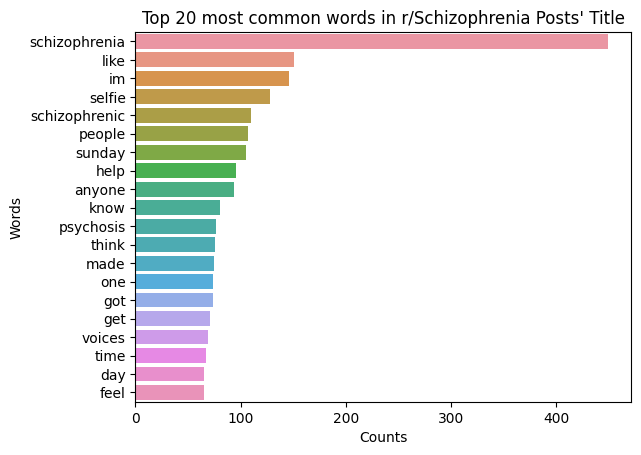

In [46]:
schizo_all_words = [word for tokens in schizophrenia_df['title_tokenized_nostopword'] for word in tokens]
schizo_word_counts = Counter(schizo_all_words)

# Get the 20 most common words
schizo_common_words = schizo_word_counts.most_common(20)

# Convert the list of tuples into two lists: one for the words and one for the counts
schizo_word_df = pd.DataFrame(schizo_common_words, columns=['Words', 'Counts'])

# Plot the words against the counts
sns.barplot(y='Words', x='Counts', data=schizo_word_df)
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 20 most common words in r/Schizophrenia Posts\' Title')
plt.show()

In an analysis of post titles in the r/schizophrenia subreddit, it is observed that the term 'schizophrenia' stands out as a central theme, appearing in approximately 15% of all post titles. A similar term 'schizophrenic' is found in 3.7% of the post titles. This highlights its significant role in the conversations occurring within this online community.
<br><br>
The term 'selfie' is the next most frequently occurring word, found in about 4% of post titles. This may point towards a trend of users sharing personal images, which could potentially serve as a form of expression or community-building.
<br><br>
Words like 'help' and 'anyone' are present in about 3% of the post titles. This implies a considerable number of posts seeking advice or shared experiences, reflecting an element of peer support within the subreddit.
<br><br>
Finally, 'psychosis', 'think', 'voices', and 'feel' each occur in about 2% of all post titles. These terms suggest a broad spectrum of discussion topics that extend to symptoms, personal experiences, and emotional states related to schizophrenia.

In [47]:
print(f'The percentage of text posts to other posts types in r/schizophrenia is {round(schizophrenia_df["text"].notnull().sum()/schizophrenia_df.shape[0]*100, 2)}%')

The percentage of text posts to other posts types in r/schizophrenia is 59.29%


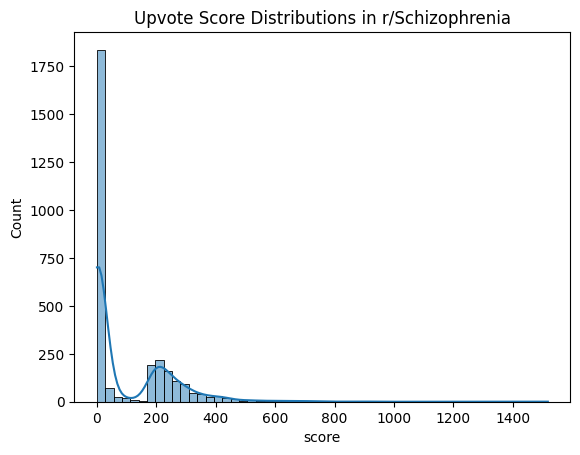

In [48]:
sns.histplot(data=schizophrenia_df, x='score', kde=True)
plt.title('Upvote Score Distributions in r/Schizophrenia')
plt.show()

In the r/schizophrenia subreddit, a significant majority of posts received no upvotes, demonstrating a strong skewness towards a lower score. Additionally, there's a noticeable secondary mode at approximately 200 upvotes. However, this constitutes a less frequent occurrence. Post distribution exhibits a declining trend beyond this secondary peak, tapering down for upvote scores exceeding 200. The frequency of posts with over 400 upvotes is practically negligible, indicating an exponential decay pattern in the upvote score distribution.

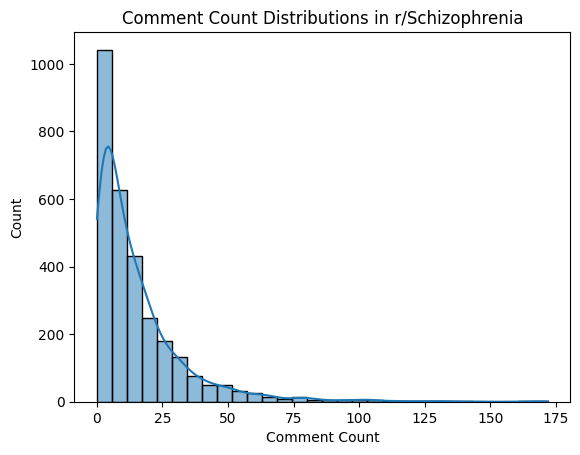

In [49]:
sns.histplot(data=schizophrenia_df, x='comments_count', kde=True, bins = 30)
plt.title('Comment Count Distributions in r/Schizophrenia')
plt.xlabel('Comment Count')
plt.show()

The distribution of comments on the posts in the r/schizophrenia subreddit appears to follow a right-skewed pattern. Majority of the posts in r/bipolar garner a relatively low number of comments, there is a minority of posts that accumulate a significantly higher comment count. This is a common pattern in online engagement, where a small number of posts generate a lot of discussion, but the majority of posts receive less interactions.

Text(0.5, 1.0, 'Award Count for Each Post in r/schizophrenia')

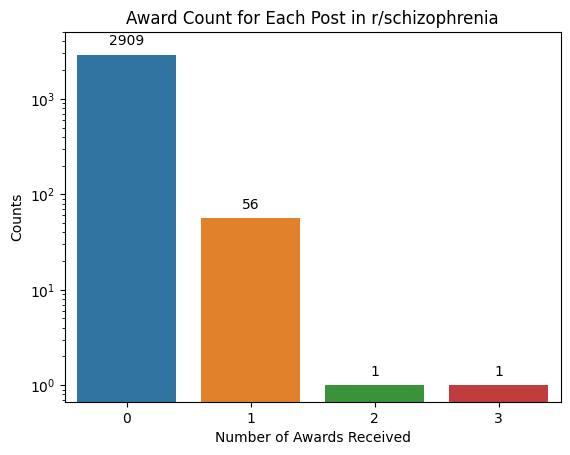

In [50]:
ax = sns.countplot(x='gilding', data=schizophrenia_df)
plt.yscale('log')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.ylim(top = 5000)
plt.xlabel('Number of Awards Received')
plt.ylabel('Counts')
plt.title('Award Count for Each Post in r/schizophrenia')

Out of the total posts analyzed, a vast majority did not receive any awards. This suggests that the awarding of posts is not a common occurrence within this subreddit community.
<br><br>
On the other hand, a small fraction of posts, received one award and rarely, two or three. This indicates that while rare, some posts do receive recognition in the form of awards from the community. These posts may contain content that is particularly resonant, informative, or valuable to the subreddit members.
<br><br>
This pattern of distribution is not uncommon in online communities, where the majority of user-generated content may not receive significant recognition, while a small fraction of content garners most of the attention and rewards.

Text(0.5, 1.0, 'Posting Frequency per Day of the Week in r/schizophrenia')

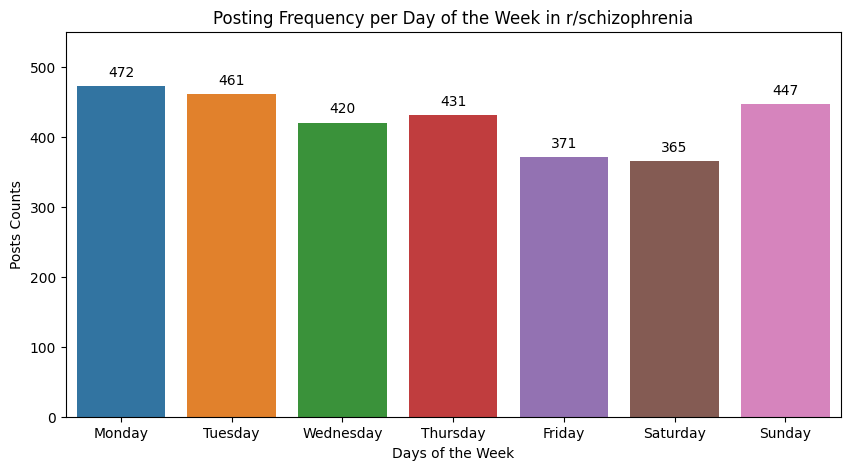

In [51]:
plt.figure(figsize=(10,5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.countplot(x='published_day_of_week', data=schizophrenia_df, order = day_order)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.xlabel('Days of the Week')
plt.ylabel('Posts Counts')
plt.ylim(top = 550)
plt.title('Posting Frequency per Day of the Week in r/schizophrenia')

The daily distribution of post frequencies within the r/schizophrenia subreddit appears to be uniform, indicating no significant difference in user engagement across different days of the week. This suggests a non-cyclic posting behavior in this community, wherein user interactions in terms of posting are evenly spread out through the week. However, a minor dip is observed on Fridays and Saturdays, but it is not enough to estabblish a clear weekly pattern or trend.

In [52]:
schizophrenia_df['hour_of_day'] = schizophrenia_df['published_time'].apply(lambda x: str(x)[:2])

Text(0.5, 1.0, 'Number of Posts per Hour of the Day')

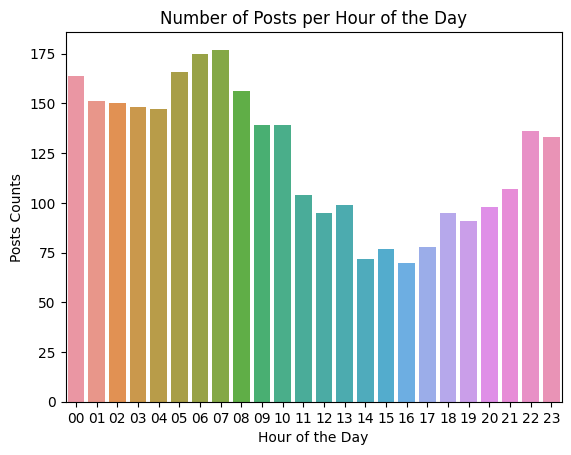

In [53]:
ax = sns.countplot(x='hour_of_day', data=schizophrenia_df, order = [str(i).zfill(2) for i in range(0, 24)])

# Set the x-axis and y-axis labels
plt.xlabel('Hour of the Day')
plt.ylabel('Posts Counts')

# Set the title of the plot
plt.title('Number of Posts per Hour of the Day')

The hourly distribution of posts in the r/schizophrenia subreddit (according to Singapore time) generally displays a uniform pattern, indicating consistent user activity across the majority of the day. However, a marked decrease in posting frequency is observed during the hours from 11:00 to 21:00. This could suggest a diurnal rhythm to user activity within this community, with potential dips in interaction during these specific hours. It's important to note that the reasons behind this could be multifaceted, possibly ranging from timezone influences to users' daily routines or habits.

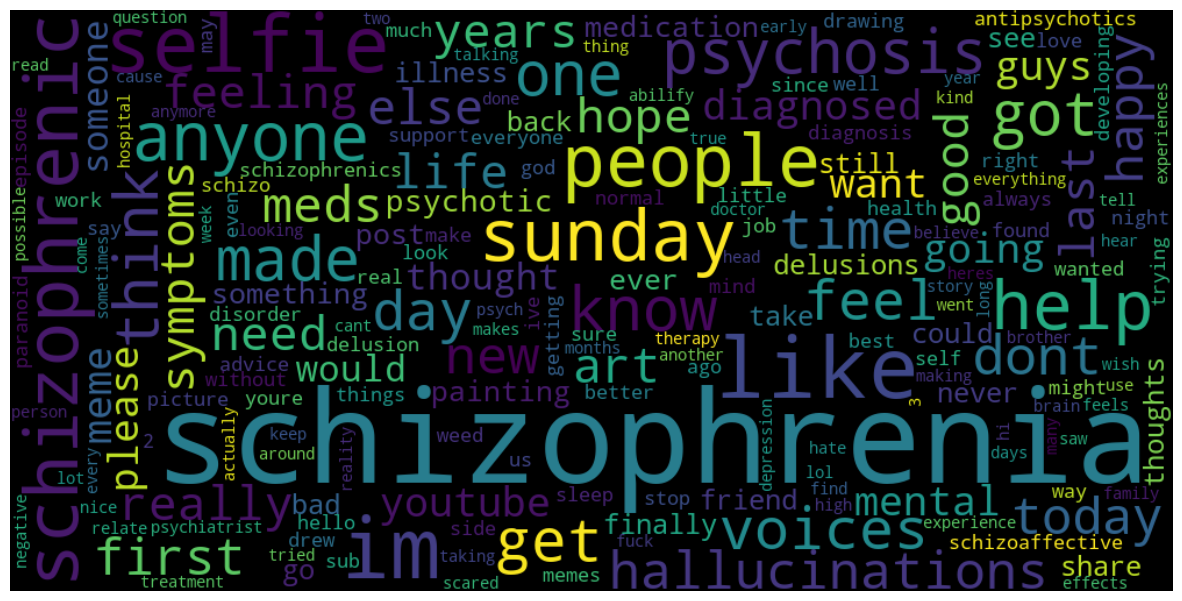

In [54]:
schizo_word_dict = dict(schizo_word_counts)
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate_from_frequencies(schizo_word_dict)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()